# Picture processing when received


* extract colours (paleta picture)
* extract colours elements (maybe contours) and from those, isolate elements (lst of elements)
* for the same colour elements:
    * check wether some elements can be grouped as one element (same bruch stroke) or not, identify same stroke elements probabilities from skeletonize??
    * isolate identified distinct elements again 
    
   

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

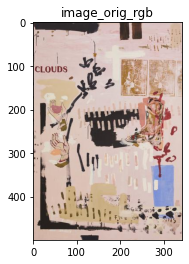

In [4]:
path="./data/tmp/"
nameInFile="tmp_resize_image.jpg"

image = cv2.imread(path + nameInFile)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("image_orig_rgb")
plt.show()

## notas: 
https://realpython.com/image-processing-with-the-python-pillow-library/

In [8]:
from PIL import   Image, ImageFilter, ImageOps

In [48]:
nameInFile="./data/tmp/tmp_resize_image.jpg"
#with Image.open(nameInFile) as img:
#    img.load()
img=  Image.open(nameInFile)  



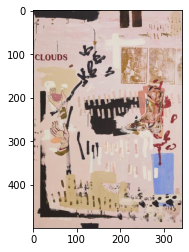

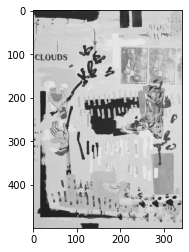

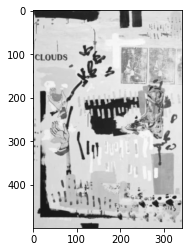

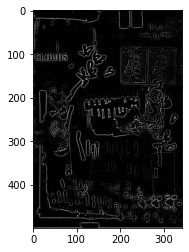

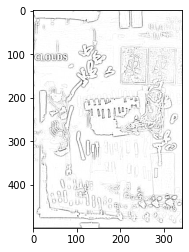

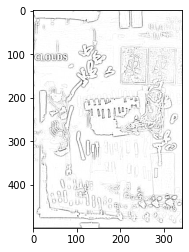

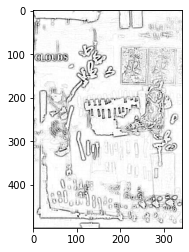

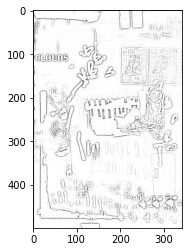

In [80]:
# extraer los contornos del dibujo_______
plt.imshow(img)
plt.show()

img_gray = img.convert("L")
plt.imshow(img_gray, cmap='gray')
plt.show()
#img_gray_edges = img_gray.filter(ImageFilter.FIND_EDGES)
#img_gray_edges.show()

#inverted_image1 = ImageOps.invert(img_gray_edges)
#inverted_image1.show()

img_gray_smooth = img_gray.filter(ImageFilter.SMOOTH)
plt.imshow(img_gray_smooth, cmap='gray')
plt.show()
img_gray_smooth_edges = img_gray_smooth.filter(ImageFilter.FIND_EDGES)
plt.imshow(img_gray_smooth_edges, cmap='gray')
plt.show()
#img_gray_smooth_edges.show()

pil_img_lines = ImageOps.invert(img_gray_smooth_edges)
#pil_img_lines.show()
plt.imshow(pil_img_lines, cmap='gray')
plt.show()
type(pil_img_lines)
tmp_img_lines= np.array(pil_img_lines)

type(tmp_img_lines)
plt.imshow(tmp_img_lines, cmap='gray')
plt.show()

kernel = np.ones((2, 2), np.uint8)
tmp_img_lines_erosion = cv2.erode(tmp_img_lines, kernel, iterations=1)
tmp_img_lines_dilate = cv2.dilate(tmp_img_lines_erosion, kernel, iterations=1)
plt.imshow(tmp_img_lines_erosion, cmap='gray')
plt.show()

plt.imshow(tmp_img_lines_dilate, cmap='gray')
plt.show()





In [ ]:

import cv2


#tmp_img_lines_erosion=cv2.cvtColor(tmp_img_lines_erosion,cv2.COLOR_BGR2GRAY)
plt.imshow(tmp_img_lines_erosion)
plt.show()


se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
out_gray=cv2.divide(tmp_img_lines_erosion, bg, scale=255)
out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 

cv2.imshow('binary', out_binary)  

cv2.imshow('gray', out_gray)  

In [32]:
tmp_img_lines

array([[ 65,  48,  90, ...,  54,  51,  50],
       [ 52, 255, 255, ..., 248, 251,  49],
       [ 47, 255, 255, ..., 253, 250,  48],
       ...,
       [ 74, 255, 249, ..., 245, 243,  52],
       [ 74, 255, 255, ..., 245, 245,  52],
       [ 74,  73,  71, ...,  53,  53,  55]], dtype=uint8)

### Extract the colours

In [22]:
df_colours=pd.read_csv('./data/tmp/tmp_df_colours.csv')  

pd.set_option('display.max_rows', 500)
df_colours_min100=df_colours[df_colours['occurence'] >100]
print('num_colores total:',len(df_colours),'   num_colores con puntos>100:',len(df_colours_min100))
df_colours_min100

num_colores total: 98    num_colores con puntos>100: 34


,R,G,B,occurence,c_code,c_name
0,217,189,177,104225,#D9BDB1,~silver
1,48,44,45,15440,#302C2D,~darkslategray
2,212,188,154,11118,#D4BC9A,~tan
3,228,220,209,8052,#E4DCD1,~gainsboro
4,186,159,152,4672,#BA9F98,~rosybrown
5,139,155,214,3582,#8B9BD6,~mediumpurple
6,133,118,111,3238,#85766F,~gray
7,184,145,116,2966,#B89174,~rosybrown
8,75,52,44,2055,#4B342C,~darkslategray
9,208,142,126,2039,#D08E7E,~rosybrown


### Paleta de colores

In [23]:
#show the complete palette extracted (filtering)
def show_palette_from_df (df_input, ingroup=25):

    n_dec=int(len(df_input)/ingroup)
    if(len(df_input) % ingroup != 0):n_dec+=1
    #print(n_dec,len(df_colours))
    ini=0
    fin=ingroup

    for k in range(n_dec):
        if fin >len(df_input):
            fin2= min(len(df_input),fin)
            array10_palette=np.array([[df_input.R[k], df_input.G[k], df_input.B[k]]  for k in range(ini,fin2)])[np.newaxis, :, :]
            #for j in range(fin-len(df_colours)):
            arrayfin2_palette=np.array([[255, 255, 255]  for j in range(fin-len(df_input))])[np.newaxis, :, :]
            #print('fin:',fin,'palette:',arrayfin_palette)
            #print(arrayfin2_palette)
            array10_palette= np.concatenate((array10_palette, arrayfin2_palette), axis=1)
            #array10_palette=array10_palette + arrayfin2_palette
            #print(array10_palette.shape)
        else:
            array10_palette=np.array([[df_input.R[k], df_input.G[k], df_input.B[k]] for k in range(ini,fin)])[np.newaxis, :, :]
        plt.imshow(array10_palette)
        plt.axis('off')
        plt.show()
        ini+=ingroup
        fin+=ingroup

print('Palette complete:', len(df_colours), '  Dots:',sum(df_colours['occurence']))
show_palette_from_df(df_colours) 

print('Palette filtered (dots gt 100):', len(df_colours_min100),'  Rejected dots:',sum(df_colours['occurence'])-sum(df_colours_min100['occurence']))
show_palette_from_df(df_colours_min100) 



Palette complete: 98   Dots: 171500


Palette filtered (dots gt 100): 34   Rejected dots: 1277


### Extraction of elements by colour (dots >100)

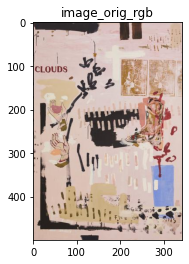

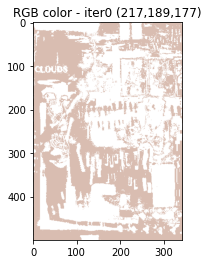

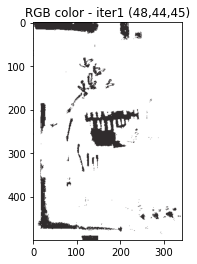

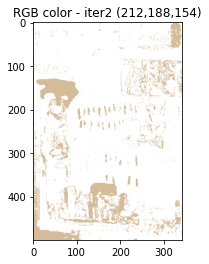

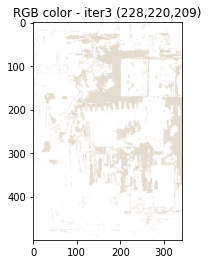

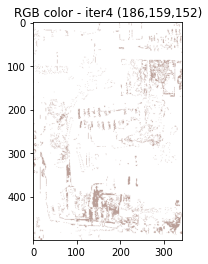

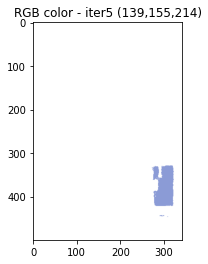

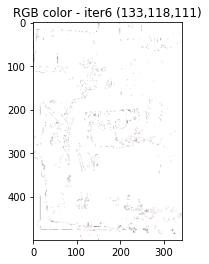

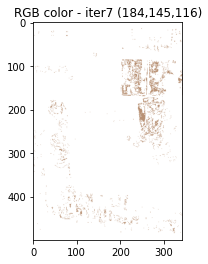

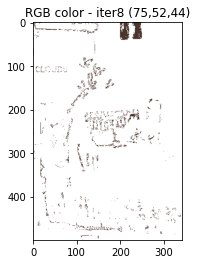

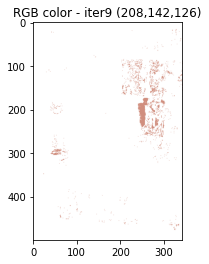

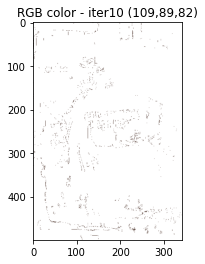

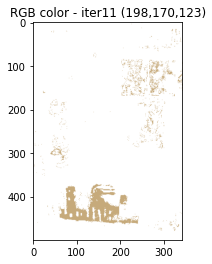

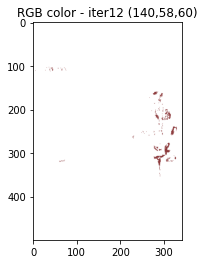

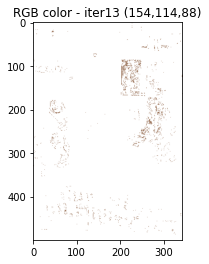

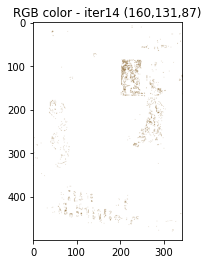

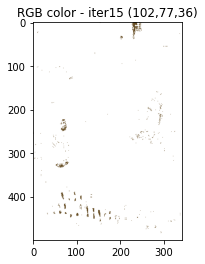

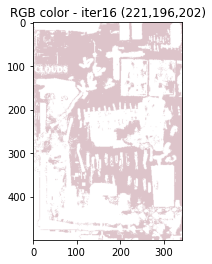

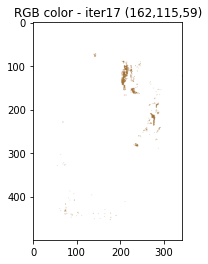

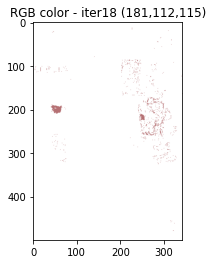

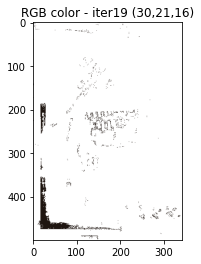

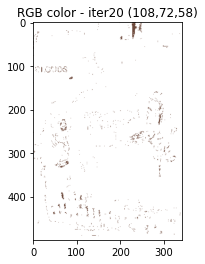

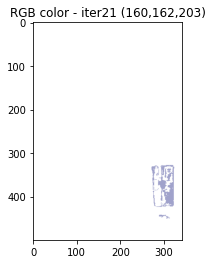

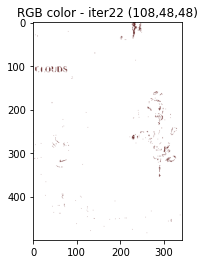

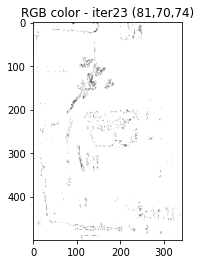

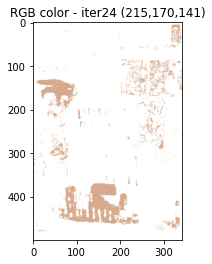

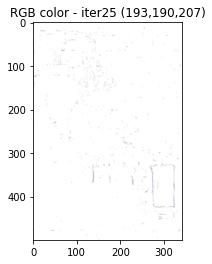

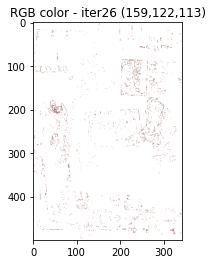

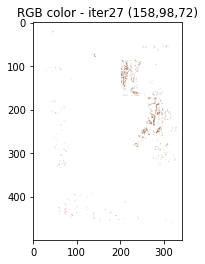

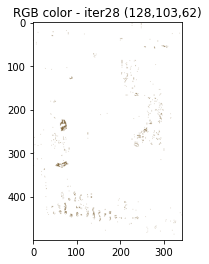

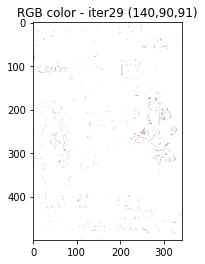

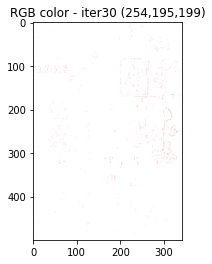

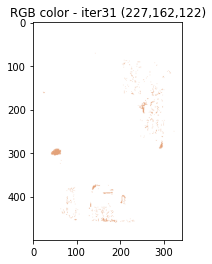

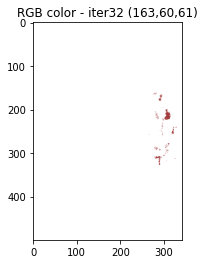

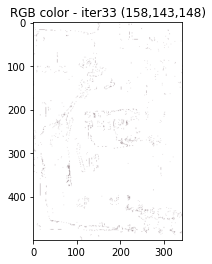

In [31]:
path="./data/tmp/"
nameInFile="tmp_resize_image.jpg"
nameOutContFile="resize_tmp_file_countours.jpg"

df_colours_s=df_colours_min100
range_c=20


image = cv2.imread(path + nameInFile)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("image_orig_rgb")
plt.show()
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2] 


for k in range(min(len(df_colours_s),100)): #len(df_colours)
    image_rgb=image.copy()
    red_c, green_c, blue_c =df_colours_s.R.iloc[k],df_colours_s.G.iloc[k],df_colours_s.B.iloc[k]

    mask_c = (red >= max(red_c -range_c,0)) &  (red <= min(red_c +range_c,255))  &  \
    (green >= max(green_c -range_c,0))  & (green <= min(green_c +range_c,255))  &  \
            (blue >= max(blue_c -range_c,0))&  (blue <= min(blue_c +range_c,255))
    
    mask_else= ~mask_c
    image_rgb[:,:,:3][mask_c]=[red_c,green_c,blue_c]
    image_rgb[:,:,:3][mask_else]=[255,255,255]

    plt.imshow(image_rgb)
    title_graph="RGB color - iter" + str(k) + ' (' + str(red_c) + ',' + str(green_c) + ',' + str(blue_c)+ ')'
    plt.title(title_graph)
    plt.show()

numpy.ndarray

array([[188, 193, 198, ..., 182, 190, 195],
       [188, 255, 255, ..., 255, 255, 184],
       [189, 249, 254, ..., 255, 255, 176],
       ...,
       [ 95, 255, 255, ..., 252, 255, 121],
       [ 95, 255, 255, ..., 251, 251, 121],
       [ 95,  95,  94, ..., 109, 114, 120]], dtype=uint8)

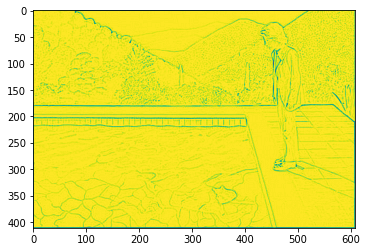

In [294]:
plt.imshow(tmp_img_lines)
#pil_img_lines.show()
tmp_img_lines

In [280]:
tmp_img_lines.shape

(411, 608)

In [260]:
img_gray_smooth_edge_enhance = img_gray_smooth.filter(ImageFilter.EDGE_ENHANCE)
img_gray_smooth_edge_enhance.show()

In [232]:
emboss = img_gray_smooth.filter(ImageFilter.EMBOSS)
emboss.show()

type(emboss)

PIL.Image.Image

In [216]:
img_gray.show()

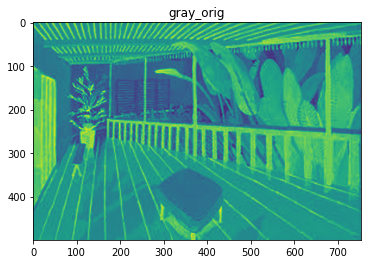

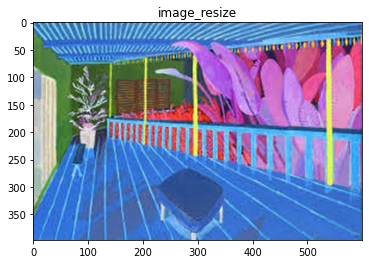

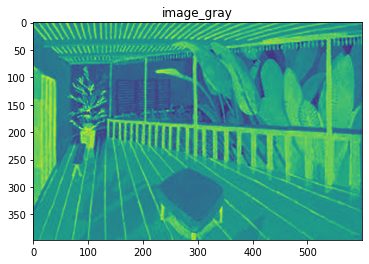

image_canny_dilate_erode


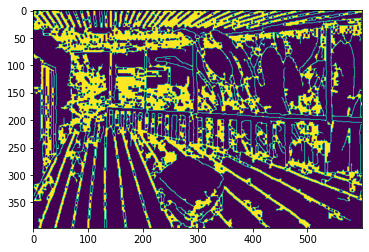

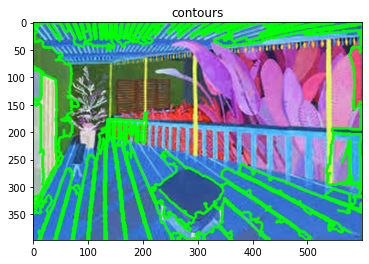

In [224]:
path="./data/tmp/"
nameInFile="tmp_resize_image.jpg"
nameOutContFile="resize_tmp_file_countours.jpg"

image = cv2.imread(path + nameInFile)

image = (255-image)    

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #to gray scale
plt.imshow(gray)
plt.title("gray_orig")
plt.show()

scale_percent= 600/gray.shape[1] #percent of established width in order to have all inputs in same scale for a later application a minimum area

width = int(gray.shape[1] * scale_percent )
height = int(gray.shape[0] * scale_percent )

# resize image
gray = cv2.resize(gray, (width, height))
image = cv2.resize(image, (width, height))
image0 = image.copy()

plt.imshow(image)
plt.title("image_resize")
plt.show()

plt.imshow(gray)
plt.title("image_gray")
plt.show()  

# elimino este transformacion (canny), demasiado accurate y da lugar a open contours
canny = cv2.Canny(gray, 10, 150)
canny = cv2.dilate(canny, None, iterations=1)
canny = cv2.erode(canny, None, iterations=1)
print("image_canny_dilate_erode")
plt.imshow(canny)
plt.show()

contours,hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

threshold_area =25  

new_contours=[]    

for i,cnt in enumerate(contours):        
    area = cv2.contourArea(cnt)         

    if area > threshold_area:             
        new_contours.append(cnt)
        cv2.drawContours(image, contours,i, (0,255,0), 3)  # se marcan los contours en verde

plt.imshow(image)
plt.title("contours")
plt.show()  

#path_contours=path 
#cv2.imwrite(path_contours + nameOutContFile, image) # almacenamos en un fichero la salida para seguimiento-validación    
    

 https://goodboychan.github.io/python/datacamp/vision/2020/08/02/02-Image-restoration-Noise-Segmentation-and-Contours.html

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 8)

In [9]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

/tmp/ipykernel_3537/2048590606.py:12: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(face_image, n_segments=100)
/tmp/ipykernel_3537/2048590606.py:15: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image = label2rgb(segments, face_image, kind='avg')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


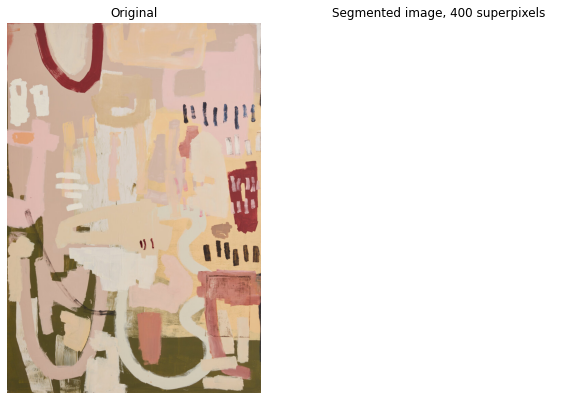

In [11]:
from skimage.segmentation import slic
from skimage.color import label2rgb


path="./data/"
nameInFile="AH01.jpg"


face_image = plt.imread(path + nameInFile)

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments=100)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
plot_comparison(face_image, segmented_image, 'Segmented image, 400 superpixels')

In [13]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

In [14]:
from skimage import measure, data

# Obtain the horse image
horse_image =  plt.imread(path + nameInFile)

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, level=0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

ValueError: Only 2D arrays are supported.

In [ ]:
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image = plt.imread('./dataset/chinese.jpg')

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments=400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
plot_comparison(face_image, segmented_image, 'Segmented image, 400 superpixels')